<a href="https://colab.research.google.com/github/wmhowarth/Prediction-of-Product-Sales/blob/main/SalesPart6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Prediction of Product Sales

- Author: Warren Howarth

## Project Overview




## Load and Inspect Data




## Clean Data

## Exploratory Data Analysis

## Explanatory Data Analysis

## Feature Inspection



## Data Dictionary

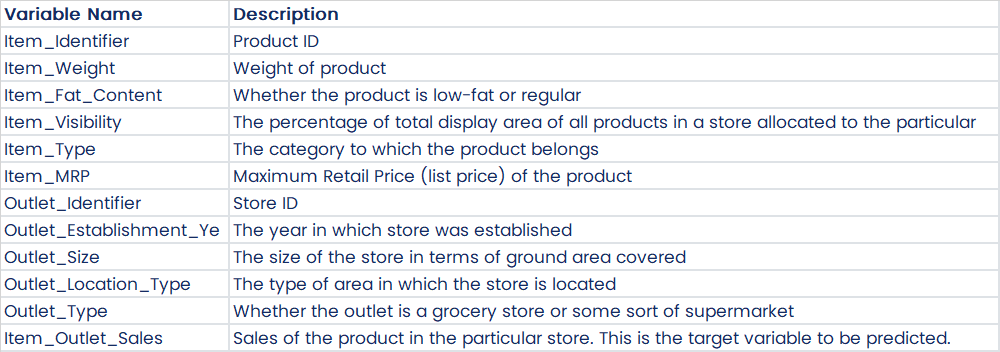


## Load and Inspect Data

In [ ]:
# import functions and libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingRegressor # NEW
from sklearn.ensemble import RandomForestRegressor # NEW
from sklearn import set_config
set_config(transform_output='pandas')


In [ ]:
# import the data and view the first 5 rows
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# View schema data using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

- Check for duplicates

In [ ]:
df.duplicated().sum()

0

> There are no duplicates

- Check Data Types

> Categorical columns

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

These seem to match the directory structures

In [ ]:
# let's look at the other values in the object columns
for name in cat_cols:
  print(f'The values for {name}')
  print(df[name].value_counts())
  print('\n')

The values for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The values for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


The values for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The values for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926


In [ ]:
# Fix the inconsistencies in 'Item_Fat_Content'
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Replace 'LF' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF','Low Fat')

In [ ]:
# Replace 'reg' with 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg','Regular')

In [ ]:
# Replace 'low fat' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat','Low Fat')

In [ ]:
# Check for inconsistencies in 'Item_Fat_Content' again
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

> Numerical columns

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# let's look at the values in the numeric columns
for name in num_cols:
  print(f'The values for {name}')
  print(df[name].value_counts())
  print('\n')

The values for Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


The values for Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


The values for Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


The values for Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


The values for Item_Outlet_Sales
958.7520     17
1342.2528    16
703.0848     15
1845.5976    1

Item_MRP - (maximum retail price, monetary amount - round to 2 decimals ?)

Item_Outlet_Sales - (Sales of the product per store, not sure in monetary amount (round to 2 decimals) or unit amount (integer value))


- Missing values

<Axes: >

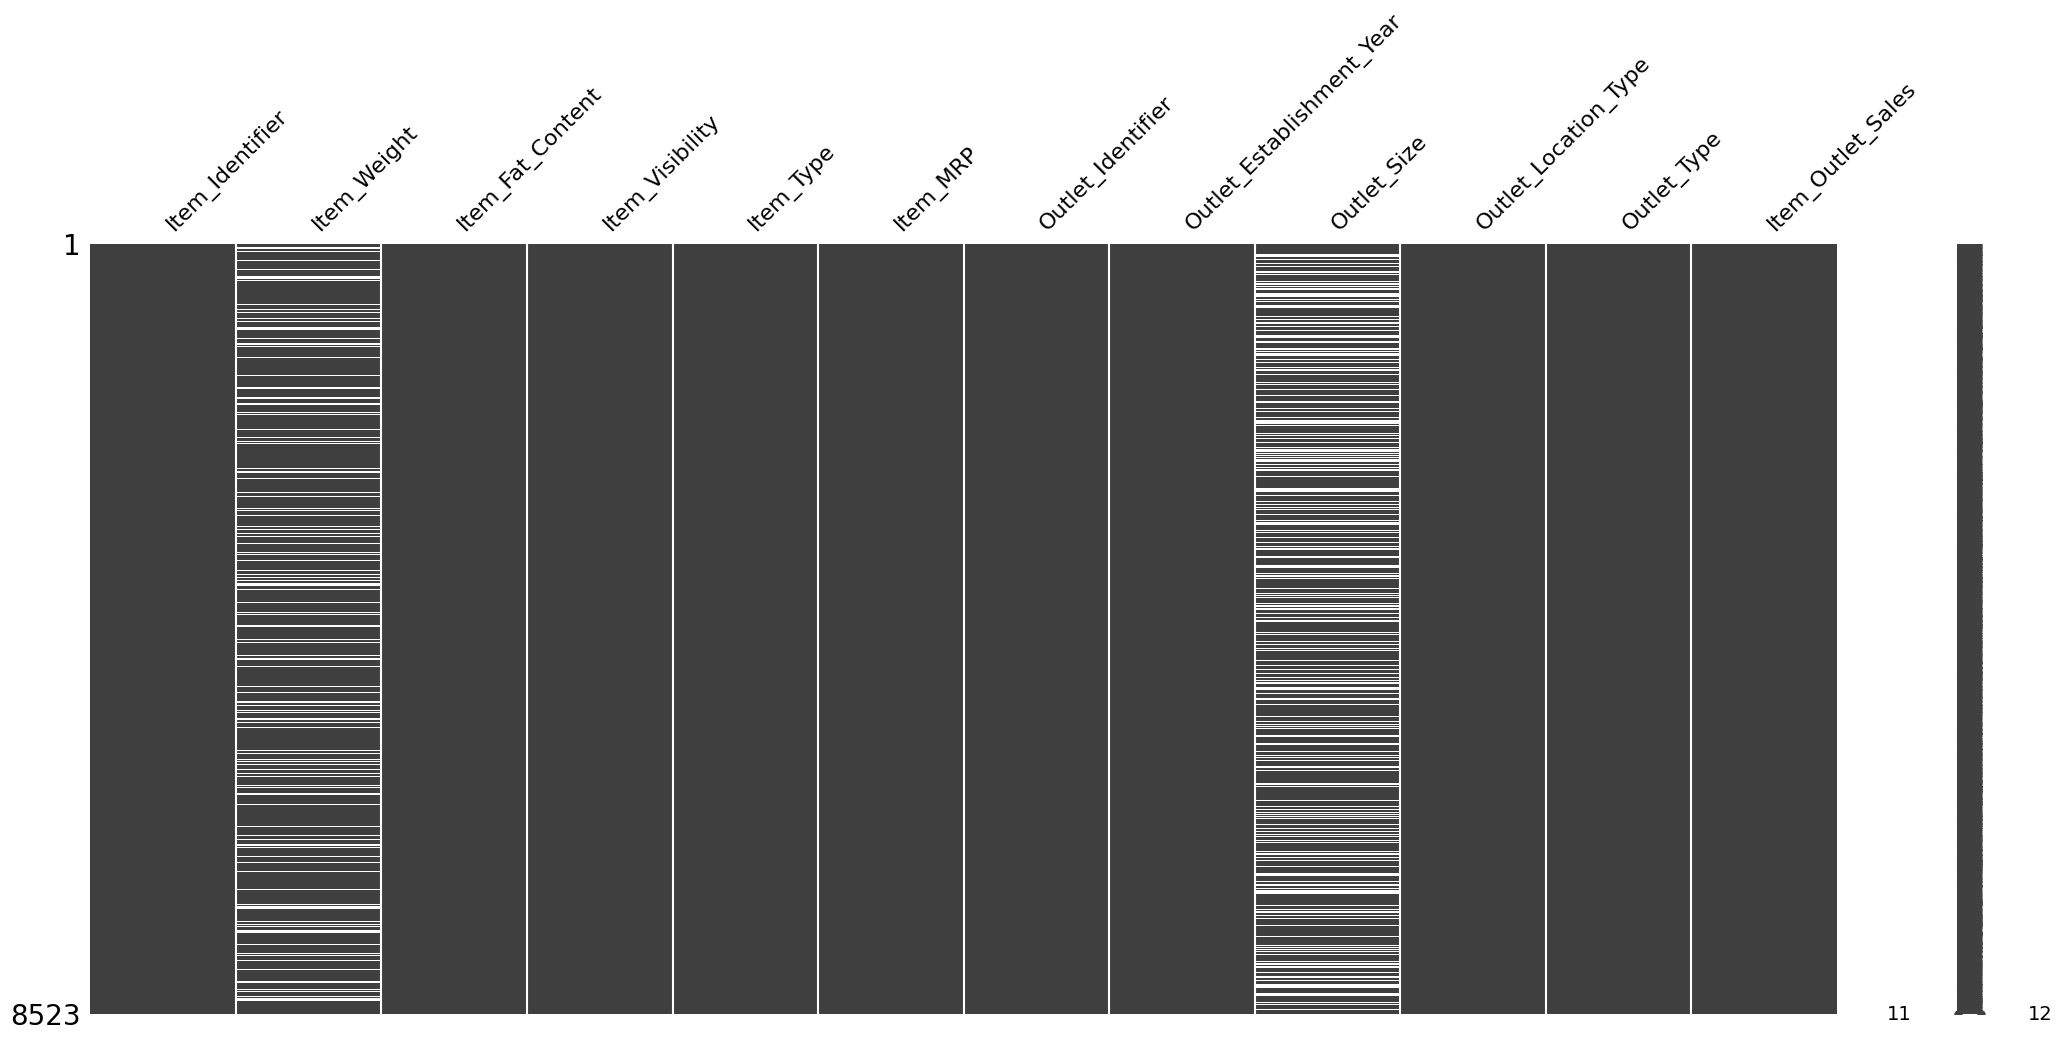

In [ ]:
# Using missingno matrix
import missingno as msno
msno.matrix(df_sales)

In [ ]:
# Using panda for 'Item_Weight'
df['Item_Weight'].isna().sum()

1463

In [ ]:
# As percentage
(df['Item_Weight'].isna().sum() / len(df)) * 100

17.165317376510618

At a later stage we will replace these null values with the mean of the Item_Weight feature

In [ ]:
# Using Panda for 'Outlet_Size'
df['Outlet_Size'].isna().sum()

2410

In [ ]:
# As percentage
(df['Outlet_Size'].isna().sum() / len(df)) * 100

28.27642848762173

At a later stage we will replace these with the mode (most common) value of the Outlet_Size feature

Item_Visibility feature - there are 526 zero values, and these will skew the results of the analysis, so we will update these with the median of the Item_Visibility feature

- Statistical info of the number columns


In [ ]:
df.describe().round()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.0,8523.0,8523.0,8523.0,8523.0
mean,13.0,0.0,141.0,1998.0,2181.0
std,5.0,0.0,62.0,8.0,1706.0
min,5.0,0.0,31.0,1985.0,33.0
25%,9.0,0.0,94.0,1987.0,834.0
50%,13.0,0.0,143.0,1999.0,1794.0
75%,17.0,0.0,186.0,2004.0,3101.0
max,21.0,0.0,267.0,2009.0,13087.0


## Exploratory Data Analysis


In [ ]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# import the data
fname = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week03/Data/Project1.csv'
df = pd.read_csv(fname)
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Unnamed: 0', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

- Histograms
-- Used to compare 2 values
-- `Lets examine the Item Market Retail Price`

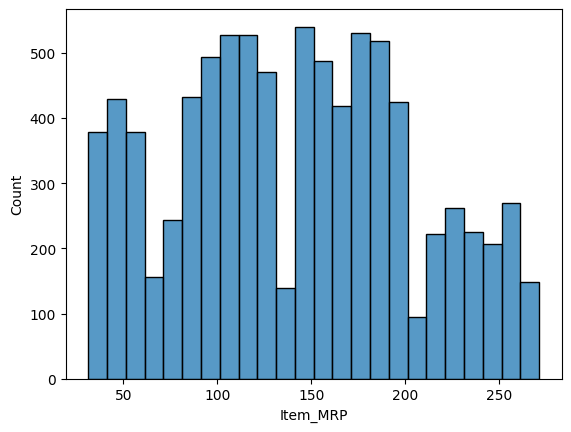

In [ ]:
# Using Seaborn
ax = sns.histplot(data = df, x = 'Item_MRP', binwidth = 10)

It doesn't look like this is useful at all

So we will try other features

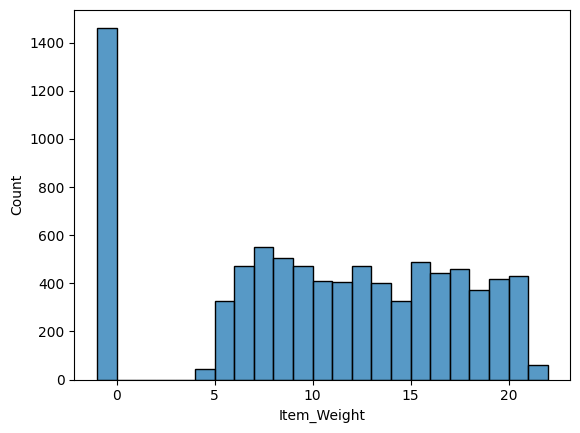

In [ ]:
# Using Seaborn
ax = sns.histplot(data = df, x = 'Item_Weight', binwidth = 1)

We previously updated the Missing values to -1, so that is the reason there are so many. Once again, it is not a useful metric

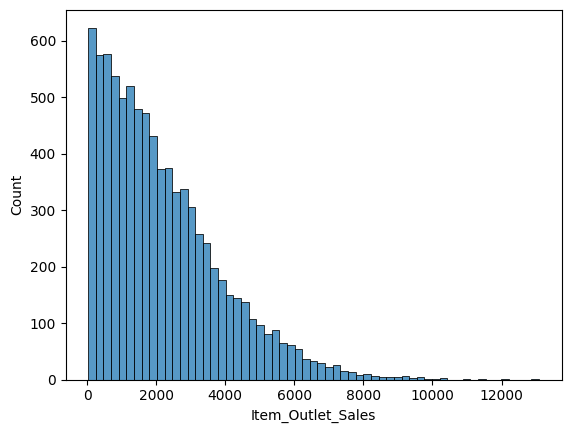

In [ ]:
# Using Seaborn
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')

- Boxplots
-- Statistical Summaries

In [ ]:
# We will use .describe() to get the info on quartiles
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

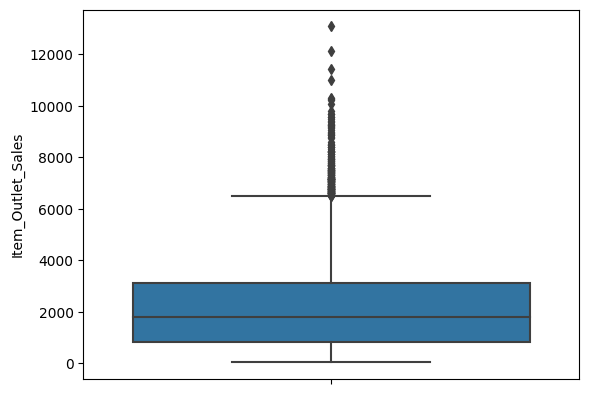

In [ ]:
# Using Seaborn
ax = sns.boxplot(data = df, y = 'Item_Outlet_Sales')

There are a number of outliers over the maximum value

- Countplots
-- To view the categorical amounts

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
# look at the item_type value_counts
val_counts = df['Item_Type'].value_counts()
val_counts

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

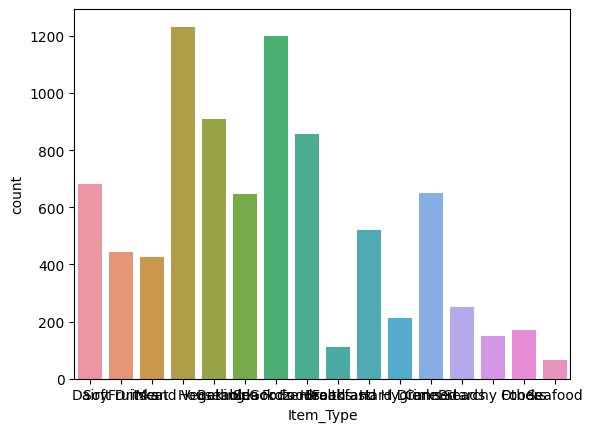

In [ ]:
# Using Seaborn
ax = sns.countplot(data = df, x = 'Item_Type')

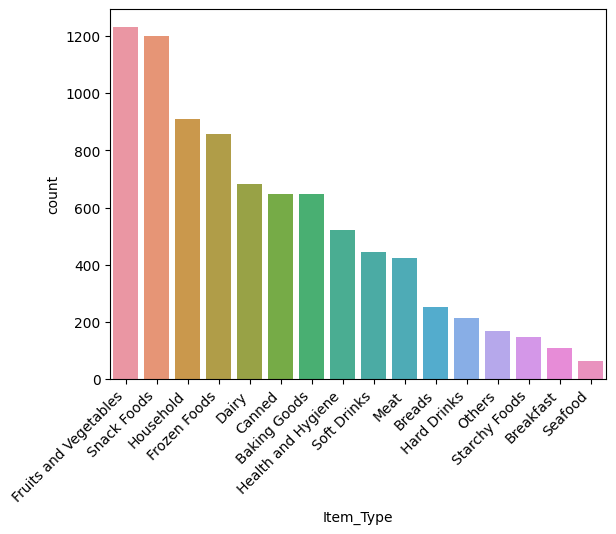

In [ ]:
# Now order them in descending order and neaten the graph
ax = sns.countplot(data = df, x = 'Item_Type', order = val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');

You can see that Fruits and Vegetables, Snack Foods, Household and Frozen Foods were the best sellers in terms of nmber of items sold

- Heatmaps
-- The correlation between numeric items

In [ ]:
# Using .corr() on the dataframe using numeric_only = True
corr = df.corr(numeric_only = True)
corr.round(2)

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Unnamed: 0,1.00,-0.03,-0.00,0.00,0.00,-0.01
Item_Weight,-0.03,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.00,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.00,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.00,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.01,-0.06,-0.13,0.57,-0.05,1.00


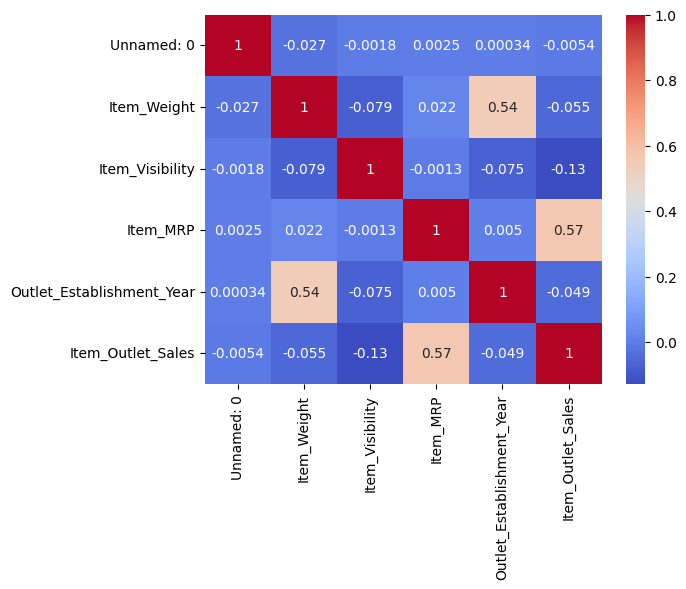

In [ ]:
# Create the heatmap
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

There is a positive relationship between Item_Price and Item_Outlet_Sales, which is to be expected.
There is also a positive relationship between Outlet_Establishment_Year and Item_Weight, which is less obvious

In [ ]:
# Save the file to the drive
fout = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week04/Data/Project1.csv'
df.to_csv(fout)

# Week 4

## Feature Analysis

In [ ]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# import the data
fname = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week04/Data/Project1.csv'
df = pd.read_csv(fname)
df.head()

,Unnamed: 0.1,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Remove the placeholders you added in week 2 and replace them with null values.

'Item_Weight' - replaced with -1

df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

In [ ]:
# get the number of records
item_weight_filter = df['Item_Weight'] == -1
df.loc[item_weight_filter, 'Item_Weight'].count()

1463

In [ ]:
# replace with nulls
df.loc[item_weight_filter, 'Item_Weight'] = np.nan

In [ ]:
# recheck number of nulls
df['Item_Weight'].isna().sum()

1463

'Outlet_Size' - replaced with 'MISSING'

df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')

In [ ]:
# get the number of records
outlet_size_filter = df['Outlet_Size'] == 'MISSING'
df.loc[outlet_size_filter, 'Outlet_Size'].count()

2410

In [ ]:
# replace with nulls
df.loc[outlet_size_filter, 'Outlet_Size'] = np.nan

In [ ]:
# recheck number of nulls
df['Outlet_Size'].isna().sum()

2410

Recheck data validity

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               8523 non-null   int64  
 1   Unnamed: 0                 8523 non-null   int64  
 2   Item_Identifier            8523 non-null   object 
 3   Item_Weight                7060 non-null   float64
 4   Item_Fat_Content           8523 non-null   object 
 5   Item_Visibility            8523 non-null   float64
 6   Item_Type                  8523 non-null   object 
 7   Item_MRP                   8523 non-null   float64
 8   Outlet_Identifier          8523 non-null   object 
 9   Outlet_Establishment_Year  8523 non-null   int64  
 10  Outlet_Size                6113 non-null   object 
 11  Outlet_Location_Type       8523 non-null   object 
 12  Outlet_Type                8523 non-null   object 
 13  Item_Outlet_Sales          8523 non-null   float

In [ ]:
# check uniqueness of Item Identifier
df['Item_Identifier'].nunique()

1559

In [ ]:
# check uniqueness of 'Unnamed: 0.1' and 'Unnamed: 0'
df['Unnamed: 0.1'].nunique()

8523

In [ ]:
df['Unnamed: 0'].nunique()

8523

In [ ]:
# remove 'Unnamed: 0'
df = df.drop(columns = ['Unnamed: 0'])

Add the EDA functions

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Data Dictionary

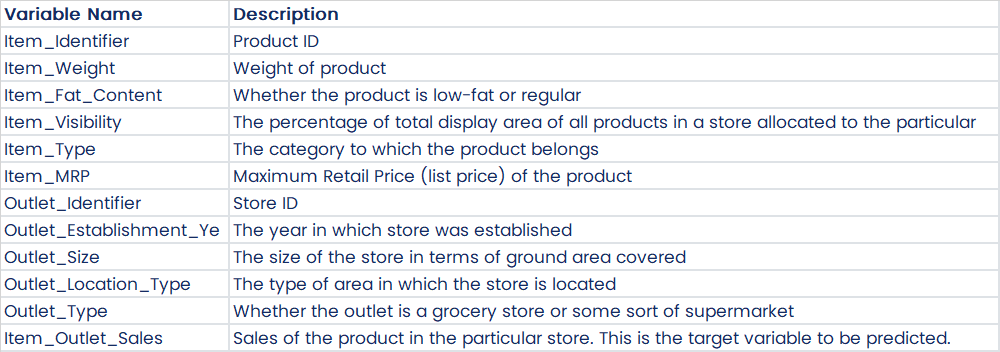

## Item Identifier

Product ID

In [ ]:
# Get the datatype
feature = 'Item_Identifier'
df[feature].dtype

dtype('O')

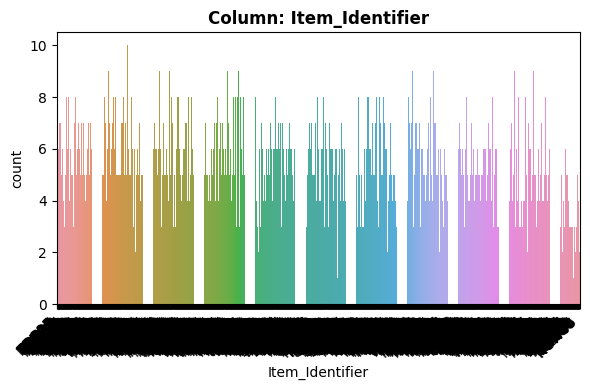

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 0.12%

- What is the cardinality? Is it high?
-- Yes (1559)
-- This feature should not be used

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- Yes, there is no reason why the item identifier will affect the sales

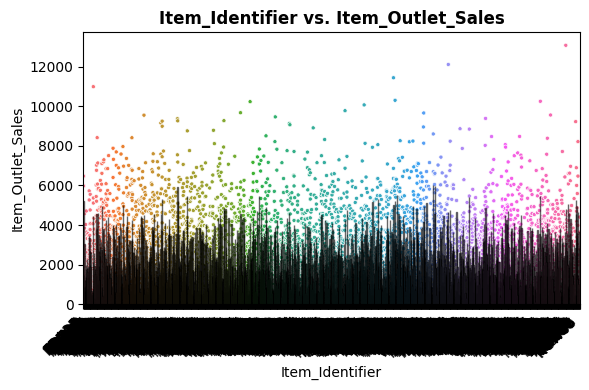

In [ ]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- No

- Does this feature appear to be a predictor of the target?
-- No

## Item Fat Content

Whether the Item is Low Fat or Regular

In [ ]:
# Get the datatype
feature = 'Item_Fat_Content'
df[feature].dtype

dtype('O')

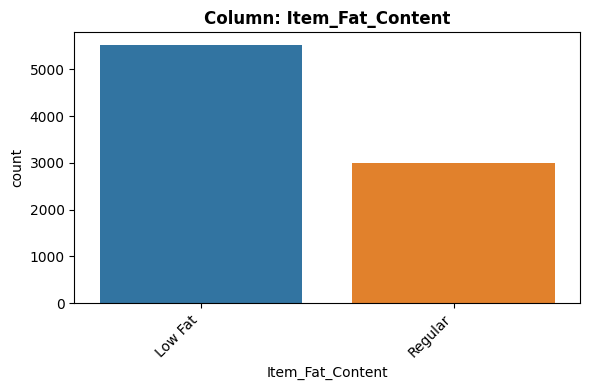

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 59.71%

- What is the cardinality? Is it high?
-- No, there are only 2 values
-- The data for this feature needs to be cleaned

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the fat content will probably influence the buying decision

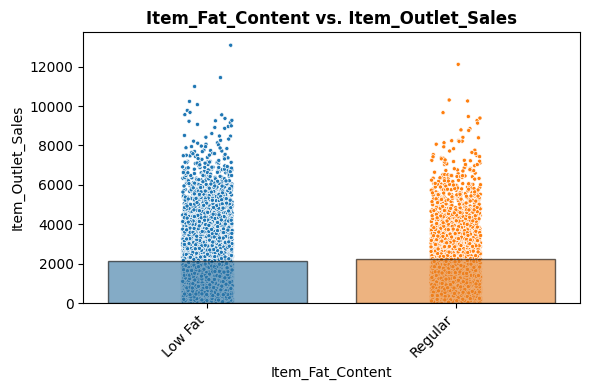

In [ ]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- No, which is confusing

## Item Type

The Category to which the item belongs

In [ ]:
# Get the datatype
feature = 'Item_Type'
df[feature].dtype

dtype('O')

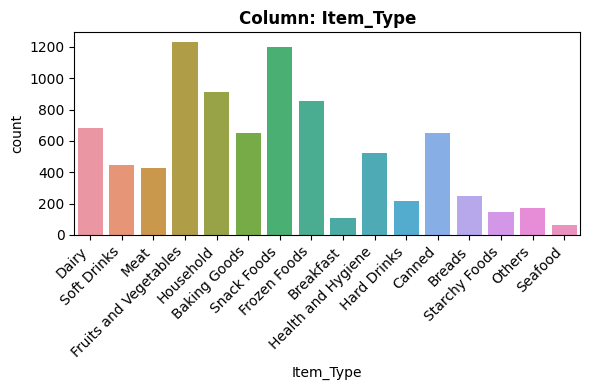

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 14.46%

- What is the cardinality? Is it high?
-- Yes (16)
-- This feature should be used with caution

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, certain types of foodstuffs are probably more expensive than others

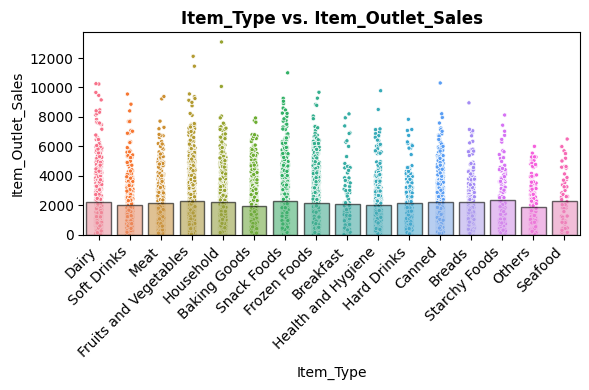

In [ ]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Not really, the mean and distribution seem pretty stable

## Outlet Identifier

Store ID

In [ ]:
# Get the datatype
feature = 'Outlet_Identifier'
df[feature].dtype

dtype('O')

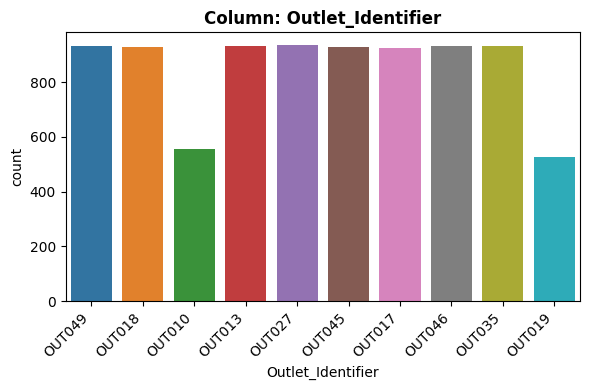

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 10.97%

- What is the cardinality? Is it high?
-- No (10)

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, there are a number of reasons why certain outlets will have higher sales than others

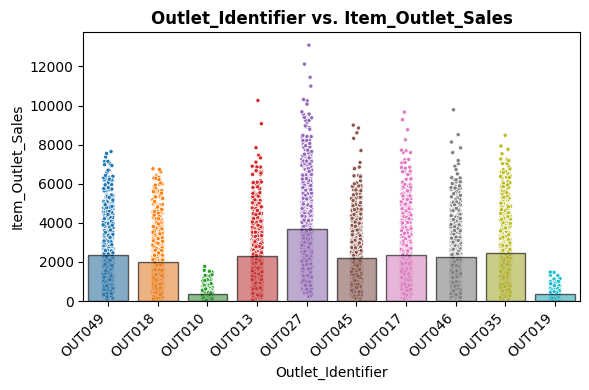

In [ ]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes

## Outlet Size

The Size of the Store in terms of Ground Area Covered

In [ ]:
# Get the datatype
feature = 'Outlet_Size'
df[feature].dtype

dtype('O')

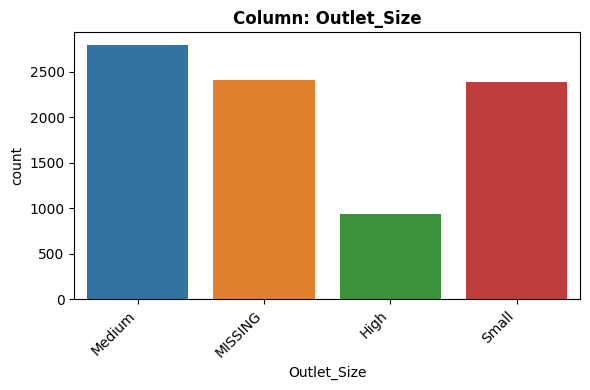

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 2410 null values.
-- 28.28 %
-- There might be a relationship between the Outlet Type and the Outlet Size, otherwise you could change the data to 'MISSING'

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 32.77%

- What is the cardinality? Is it high?
-- No (4)

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, there is a good chance that the size of the store will have an impact on sales

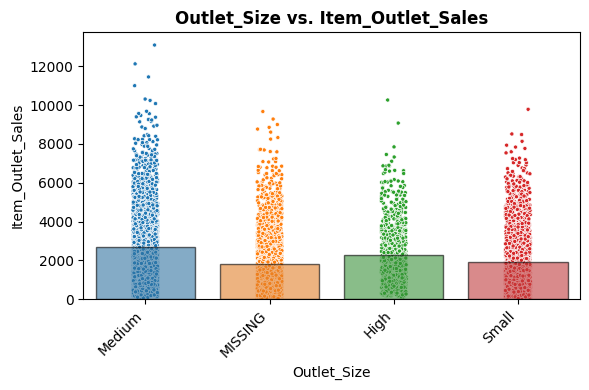

In [ ]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes

## Outlet Location Type

The Type of Area in which the Store is Located

In [ ]:
# Get the datatype
feature = 'Outlet_Location_Type'
df[feature].dtype

dtype('O')

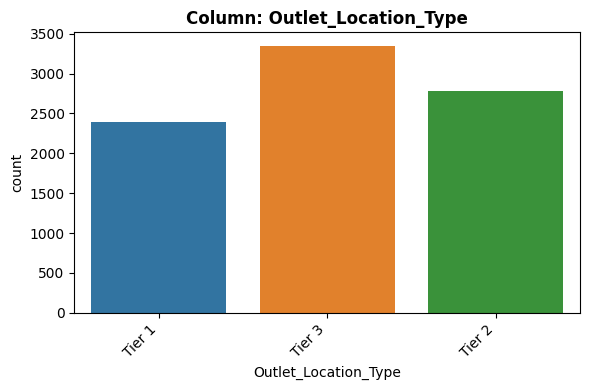

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 39.31%

- What is the cardinality? Is it high?
-- No (3)

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the area where the store is is likely to affect the sales

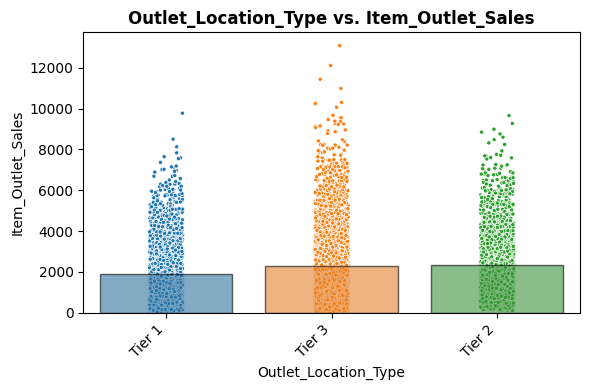

In [ ]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes, there are differences in mean and distibution

## Outlet Type

Whether the Outlet is a Grocery Store or some sort of Supermarket

In [ ]:
# Get the datatype
feature = 'Outlet_Type'
df[feature].dtype

dtype('O')

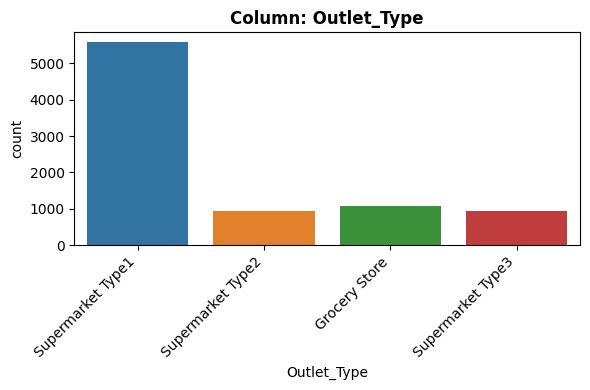

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_categorical(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute.

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 65.43%

- What is the cardinality? Is it high?
-- No (4)

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the type of store could also affect the sales

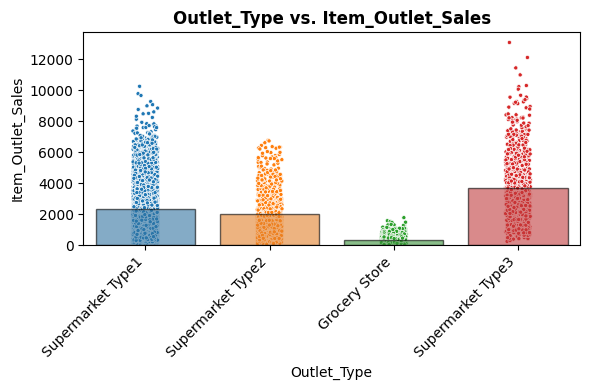

In [ ]:
# Call the correct Multivariate function
plot_categorical_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes, this feature has significant differences in mean and distribution

## Item Weight

Weight of Product

In [ ]:
# Get the datatype
feature = 'Item_Weight'
df[feature].dtype

dtype('float64')

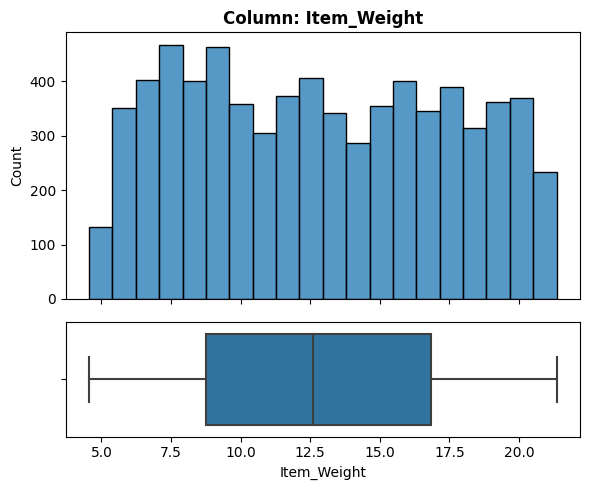

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_numeric(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 1463 null values.
-- 17.17%
-- Probably need to impute with the mean of the other values, since there are such a large number

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 17.17%

- What is the cardinality? Is it high?
-- Cardinality is not taken into consideration for numeric features

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the weight of a food item will impact the price

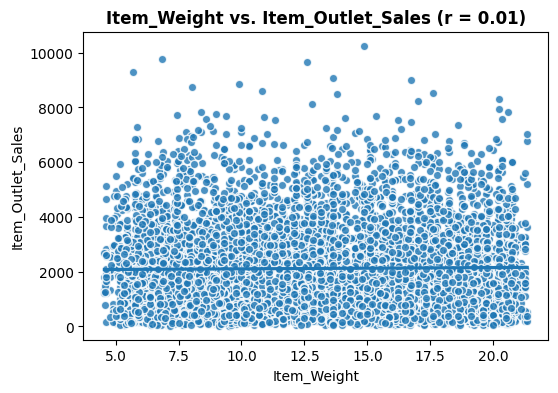

In [ ]:
# Call the correct Multivariate function
plot_numeric_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- No, not at all!!

## Item Visibility

The Percentage of Total Display Area in a Store Allocated to the Particular Product

In [ ]:
# Get the datatype
feature = 'Item_Visibility'
df[feature].dtype

dtype('float64')

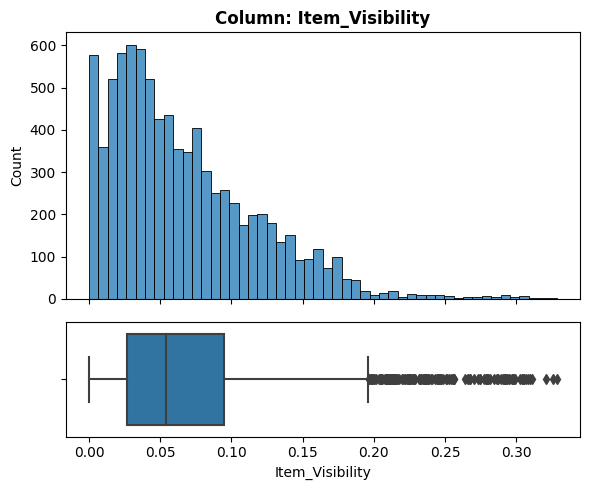

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_numeric(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 6.17%

- What is the cardinality? Is it high?
-- Cardinality is not taken into consideration for numeric features

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the visibility of a food item will impact the sales

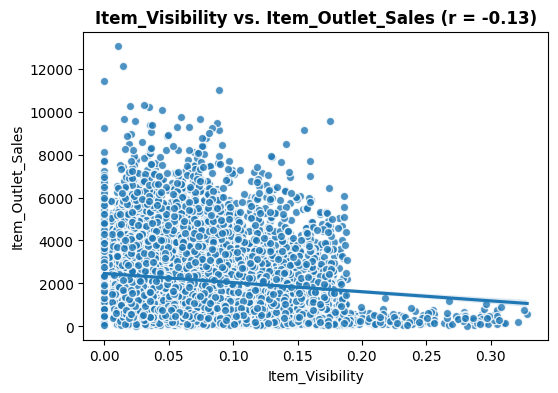

In [ ]:
# Call the correct Multivariate function
plot_numeric_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes, but with a negative correlation, which is opposite of what I would expect

## Item MRP

Maximum Retail Price (List Price) of the Product

In [ ]:
# Get the datatype
feature = 'Item_MRP'
df[feature].dtype

dtype('float64')

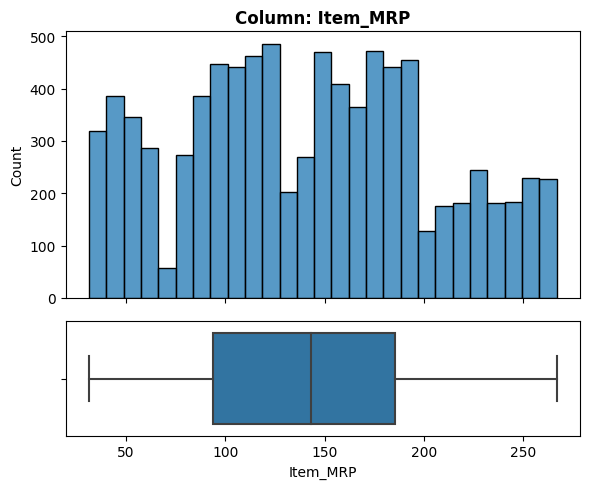

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_numeric(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 0.08%

- What is the cardinality? Is it high?
-- Cardinality is not taken into consideration for numeric features

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the price will impact the sales

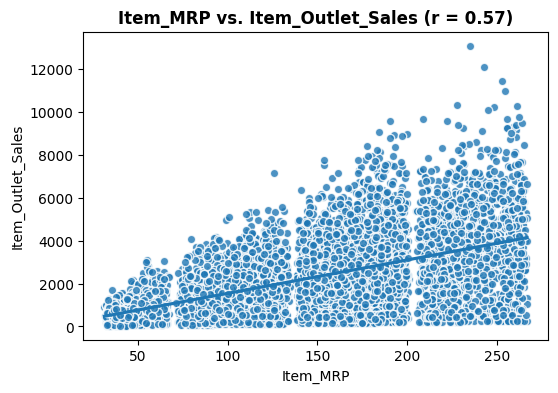

In [ ]:
# Call the correct Multivariate function
plot_numeric_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes, there is a strong positive correlation

## Outlet Establishment Year

The Year in which the Store was Established

In [ ]:
# Get the datatype
feature = 'Outlet_Establishment_Year'
df[feature].dtype

dtype('int64')

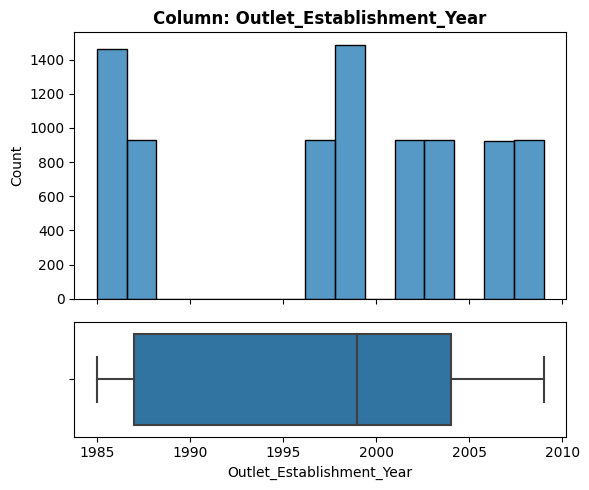

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_numeric(df, feature);

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 17.17%

- What is the cardinality? Is it high?
-- Cardinality is not taken into consideration for numeric features

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- Yes, shouldn't make a difference ?

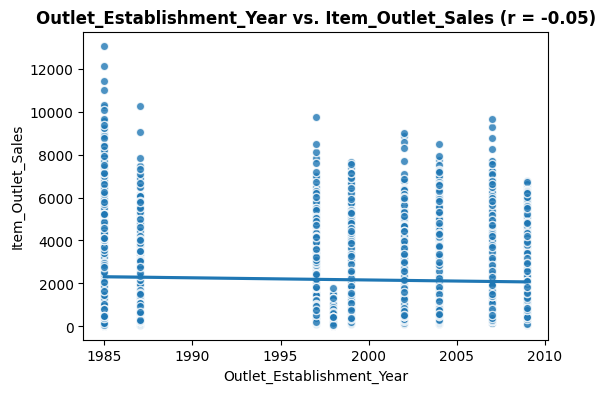

In [ ]:
# Call the correct Multivariate function
plot_numeric_vs_target(df, feature);

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- No

- Does this feature appear to be a predictor of the target?
-- No

# Week 5
## Machine Learning

## Data Dictionary

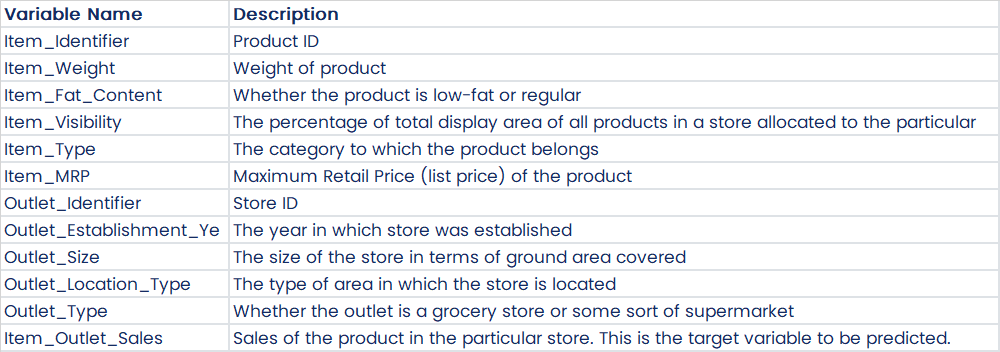



In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
# import the data afresh
fname = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week06/Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Examine the duplicates
duplicates = df.duplicated()
df[duplicates]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


There are no duplicates

In [ ]:
# check the datatypes against the dictionary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


All the columns seem to be of the correct datatype as defined in the dictionary

In [ ]:
# Fix inconsistencies in categorical data
# find the categorical columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Loop through the columns and check the values
for col in cat_cols:
  print(f'The column is {col}')
  print(df[col].value_counts())
  print('\n')

The column is Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The column is Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The column is Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The column is Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    93

In [ ]:
# Fix the inconsistencies in 'Item_Fat_Content'
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Replace 'LF' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF','Low Fat')

In [ ]:
# Replace 'reg' with 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg','Regular')

In [ ]:
# Replace 'low fat' with 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat','Low Fat')

In [ ]:
# Check for inconsistencies in 'Item_Fat_Content'
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Define the features (X) and target (y)
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

In [ ]:
# check the first 5 rows of X
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Create a Preprocessor

Numeric Pipeline
  
> impute missing values with mean
>
> scale the data

In [ ]:
# define the numeric columns
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [ ]:
# instantiate the processes
impute_mean = SimpleImputer(strategy = 'mean')
num_scaler = StandardScaler()
# create the numeric pipeline
num_pipe = make_pipeline(impute_mean, num_scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Make a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

Ordinal Pipeline
  
> impute missing values with the mode (most_frequent)
>
> Encode the features ordinally
>
> scale the data

In [ ]:
# Define the ordinal columns
ord_cols = ['Outlet_Size', 'Outlet_Location_Type']
ord_cols

['Outlet_Size', 'Outlet_Location_Type']

In [ ]:
# Instantiate the processes
# Define imputer for ordinal data
impute_ord = SimpleImputer(strategy = 'most_frequent')
# Define the ordinal encoder
outlet_size_vals = ['Small', 'Medium', 'High']
outlet_location_type_vals = ['Tier 1', 'Tier 2', 'Tier 3']
ordinal_cat_vals = [outlet_size_vals, outlet_location_type_vals]
ord_encoder = OrdinalEncoder(categories = ordinal_cat_vals)
# Define the ordinal scaler
scaler_ord = StandardScaler()
# create the ordinal pipeline
ord_pipe = make_pipeline(impute_ord, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [ ]:
# Make an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                             ['Tier 1', 'Tier 2', 'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size', 'Outlet_Location_Type'])

Categorical Pipeline
  
> impute missing values with 'NA'
>
> OneHotEncode the categories for each feature


In [ ]:
# Define list of categorical names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
ohe_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Type'],
      dtype='object')

In [ ]:
# drop the 'Item_Identifier' field, as it adds no value to the analysis
ohe_cols = ohe_cols[1:]
ohe_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')

In [ ]:
# Instantiate the processes
# Define imputer for categorical data
impute_cat = SimpleImputer(strategy = 'constant', fill_value = 'NA')
# define the OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# create the categorical pipeline
cat_pipe = make_pipeline(impute_cat, ohe_encoder)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
# Make a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', cat_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))

In [ ]:
# Instantiate the column transformer
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    remainder='passthrough',
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencod...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Fit the transformer on the  training data
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencod...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Transform the Training Data
X_train_tf = col_transformer.transform(X_train)
X_train_tf.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.0,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,0.1,0.15,0.03,0.06,0.11,0.05,0.02,0.01,0.14,0.05,0.02,0.06,0.11,0.11,0.11,0.06,0.11,0.11,0.11,0.11,0.11,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,0.27,0.3,0.36,0.16,0.24,0.31,0.21,0.14,0.08,0.35,0.22,0.14,0.25,0.31,0.31,0.31,0.24,0.32,0.31,0.31,0.31,0.31,0.33,0.48,0.31,0.32
min,-1.98,-1.29,-1.77,-1.53,-1.38,-1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.81,-0.76,-0.76,-1.29,-1.38,-1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,-0.23,0.03,0.14,0.29,-0.15,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.76,0.56,0.72,0.73,0.29,1.08,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,2.00,5.13,1.99,1.33,1.96,1.08,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# check for null values
X_train_tf.isna().sum().sum()

0

In [ ]:
# check the dtypes
X_train_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6392 non-null   float64
 1   Item_Visibility                  6392 non-null   float64
 2   Item_MRP                         6392 non-null   float64
 3   Outlet_Establishment_Year        6392 non-null   float64
 4   Outlet_Size                      6392 non-null   float64
 5   Outlet_Location_Type             6392 non-null   float64
 6   Item_Fat_Content_Low Fat         6392 non-null   float64
 7   Item_Fat_Content_Regular         6392 non-null   float64
 8   Item_Type_Baking Goods           6392 non-null   float64
 9   Item_Type_Breads                 6392 non-null   float64
 10  Item_Type_Breakfast              6392 non-null   float64
 11  Item_Type_Canned                 6392 non-null   float64
 12  Item_Type_Dairy  

In [ ]:
# view the first 5 rows
X_train_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier
4776,0.817249,-0.712775,1.828109,1.327849,0.287374,1.084948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NCG06
7510,0.556340,-1.291052,0.603369,1.327849,0.287374,1.084948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,FDV57
5828,-0.131512,1.813319,0.244541,0.136187,0.287374,-1.384777,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,FDM27
5327,-1.169219,-1.004931,-0.952591,0.732018,-1.384048,-0.149914,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,FDG24
4810,1.528819,-0.965484,-0.336460,0.493686,0.287374,-0.149914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,FDD05


In [ ]:
# Transform the Testing Data
X_test_tf = col_transformer.transform(X_test)
X_test_tf.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0,2131.0,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0
mean,-0.04,0.01,-0.06,-0.01,0.01,-0.04,0.65,0.35,0.08,0.04,0.01,0.08,0.08,0.11,0.13,0.02,0.06,0.1,0.06,0.02,0.01,0.14,0.05,0.01,0.07,0.11,0.11,0.11,0.07,0.1,0.1,0.11,0.11,0.12,0.13,0.66,0.11,0.1
std,1.01,1.04,0.98,0.99,1.01,1.01,0.48,0.48,0.27,0.19,0.11,0.27,0.27,0.31,0.34,0.14,0.24,0.3,0.23,0.13,0.10,0.34,0.23,0.11,0.25,0.32,0.31,0.31,0.25,0.3,0.3,0.31,0.31,0.32,0.34,0.47,0.31,0.3
min,-1.97,-1.29,-1.75,-1.53,-1.38,-1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,-0.89,-0.76,-0.78,-1.29,-1.38,-1.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,0.00,-0.24,-0.15,0.14,0.29,-0.15,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.0
75%,0.73,0.56,0.64,0.73,0.29,1.08,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.0
max,2.00,4.79,1.99,1.33,1.96,1.08,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0


In [ ]:
# check for null values
X_test_tf.isna().sum().sum()

0

In [ ]:
# check the dtypes
X_test_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 7503 to 1784
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      2131 non-null   float64
 1   Item_Visibility                  2131 non-null   float64
 2   Item_MRP                         2131 non-null   float64
 3   Outlet_Establishment_Year        2131 non-null   float64
 4   Outlet_Size                      2131 non-null   float64
 5   Outlet_Location_Type             2131 non-null   float64
 6   Item_Fat_Content_Low Fat         2131 non-null   float64
 7   Item_Fat_Content_Regular         2131 non-null   float64
 8   Item_Type_Baking Goods           2131 non-null   float64
 9   Item_Type_Breads                 2131 non-null   float64
 10  Item_Type_Breakfast              2131 non-null   float64
 11  Item_Type_Canned                 2131 non-null   float64
 12  Item_Type_Dairy  

In [ ]:
# view the first 5 rows
X_test_tf.head().round(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier
7503,0.33101,-0.77665,-0.99882,-1.29381,1.95880,1.08495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,FDI28
2957,-1.17989,0.10032,-1.58519,-0.10215,-1.38405,-1.38478,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NCM17
7031,0.37845,-0.48299,-1.59578,0.13619,0.28737,-1.38478,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,FDC14
1084,0.00000,-0.41544,0.50659,-1.53214,0.28737,1.08495,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DRC36
856,-0.64266,-1.04743,0.88672,0.73202,-1.38405,-0.14991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,FDS27


### Week 6

- Phase 4 - Modelling

1. Your first task is to build a linear regression model to predict sales.

Build a linear regression model.

Use the custom evaluation function to get the metrics for your model (on training and test data).
Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?

Firstly I would like to examine the Item Visibility feature again
I notice that there are a large number of entries of zero (0), which would be similar to a null value.

In [ ]:
# Get the Item_Visibility values
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [ ]:
# there are 526 zero values
# convert the zero values to the mean of the Item_visibility
item_vis_mean = df['Item_Visibility'].mean()
# make a copy of the Dataframe
df_temp = df.copy()
# create a filter of the zero values
filter_item_vis = df_temp['Item_Visibility'] == 0
# update the filter values to the mean value
df_temp.loc[filter_item_vis, 'Item_Visibility'] = item_vis_mean
df_temp['Item_Visibility'].value_counts()
#df.loc[df['Price'] > 5]

0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

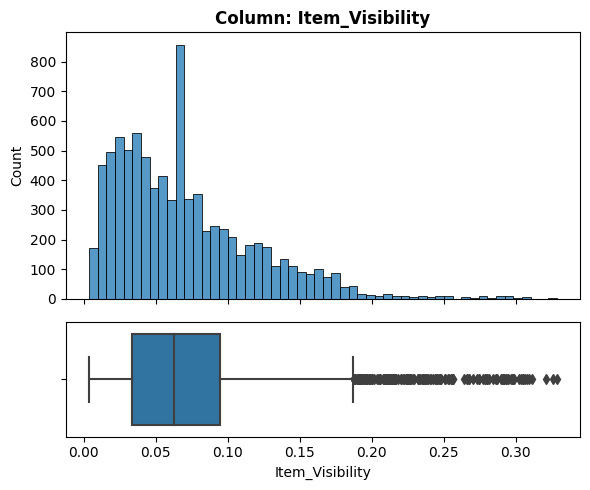

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.06613202877895108' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [ ]:
# call the Correct Univariate function
explore_numeric(df_temp, 'Item_Visibility');

Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 0 null values.
-- No need to impute

- Is the feature constant or quasi-constant?
-- No, the highest percentage is 6.17%

- What is the cardinality? Is it high?
-- Cardinality is not taken into consideration for numeric features

- Would we know this BEFORE the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- No, the visibility of a food item will impact the sales

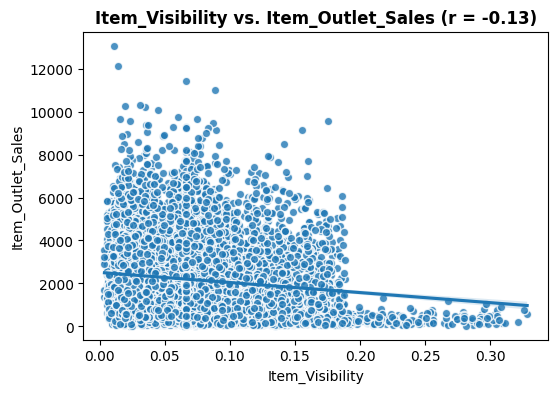

In [ ]:
# Call the correct Multivariate function
plot_numeric_vs_target(df_temp, 'Item_Visibility');

Feature Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes

- Does this feature appear to be a predictor of the target?
-- Yes, but with a negative correlation, which is opposite of what I would expect

OK, this made no difference to the correlation, which was unexpected

- Build the regression model

In [ ]:
# examine the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Determine which columns will be dropped and why

1. Drop Item Identifier
> - Large number of unique values
2. Drop Outlet Establishment Year
> - Can't do anything about it and has no correlation to sales

In [ ]:
# large number of unique values in Item Identifier
df['Item_Identifier'].nunique()

1559

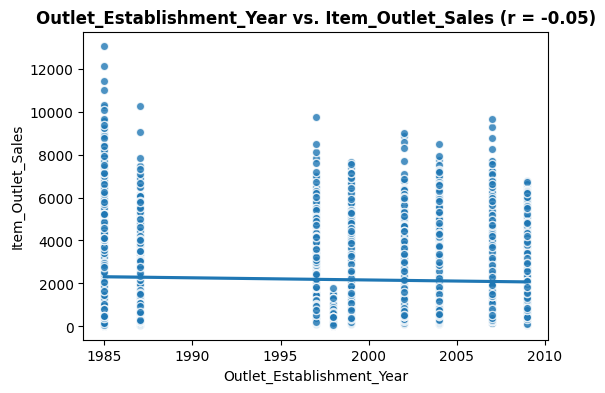

In [ ]:
# Outlet Establishment Year Correlation to sales
# Call the correct Multivariate function
plot_numeric_vs_target(df, 'Outlet_Establishment_Year');

In [ ]:
# Define the features (X) and target (y)
# Drop unwanted columns
drop_cols = ['Item_Identifier', 'Outlet_Establishment_Year']
X = df.drop(columns = [*drop_cols,'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,NaN,Tier 2,Supermarket Type1


- Build the Linear Regression Model

In [ ]:
# load the column selector functionality
from sklearn.compose import make_column_selector
# load the Linear Regression Model
from sklearn.linear_model import LinearRegression
# load the error metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Categorical Pipeline
  
> impute missing values with 'NA'
>
> OneHotEncode the categories for each feature

In [ ]:
# get the categorical columns
cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# Pipeline for Preprocessing Categorical Data
# Instantiate transfomers
imputer_cat = SimpleImputer(strategy = 'constant', fill_value = 'NA')
ohe = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
# Instantiate the pipeline
cat_pipe = make_pipeline(imputer_cat, ohe)
# Make a tuple for column transformer
cat_tuple = ('categorical',cat_pipe, cat_selector)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7a64759de950>)

Numeric Pipeline
  
> impute missing values with mean
>
> scale the data

In [ ]:
# Select numeric columns
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [ ]:
# Pipeline for Preprocessing Numeric Data
# Instantiate the transformers
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')
# Instantiate the pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
# Make the tuple for ColumnTransformer
num_tuple = ('numeric',num_pipe, num_selector)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7a64759fb7c0>)

In [ ]:
# Create the ColumnTranformer
# Create the preprocessing ColumnTransformer
preprocessor = ColumnTransformer([cat_tuple, num_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759de950>),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759fb7c0>)],
                  verbose_feature_names_out=False)

In [ ]:
# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759de950>),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759fb7c0>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759de950>),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759fb7c0>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

Import the custom functions to be able to evaluate the model

In [ ]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [ ]:
# Obtain Model Evaluation using custom function
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 848.498
- MSE = 1,303,687.617
- RMSE = 1,141.791
- R^2 = 0.559

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 803.891
- MSE = 1,193,916.035
- RMSE = 1,092.665
- R^2 = 0.567


Comparing the R^2 figures for the Training and Test Data (.559 and .567), it would appear as if the model is slightly underfit, although a score of over 50% is not a bad start, so it could even be relatively well balanced

2. Your second task is to build a Random Forest model to predict sales.

Build a default Random Forest model.

Use the custom evaluation function to get the metrics for your model (on training and test data).

Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?

Compare this model's performance to the linear regression model: which model has the best test scores?

In [ ]:
# import the Random Forest model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [ ]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759de950>),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759fb7c0>)],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.990
- MSE = 183,202.531
- RMSE = 428.022
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 764.339
- MSE = 1,214,499.711
- RMSE = 1,102.043
- R^2 = 0.560


To what extent is this model overfit/underfit?

The model is overfit, it is very good on the training data at .938, but in comparison it is bad on the testing data at only .560

Compare this model's performance to the linear regression model:

The linear regression model is slightly better on the testing data at .567 vs .560

3. Use GridSearchCV to tune at least two hyperparameters for a Random Forest model.

After determining the best parameters from your GridSearch, fit and evaluate a final best model on the entire training set (no folds).

Compare your tuned model to your default Random Forest: did the performance improve?

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Tune with GridSearchCV
# First, let's explore the parameters available for tuning a random forest regressor.
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759de950>),
                                   ('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                    

In [ ]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None]
          }

In [ ]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs = -1,  verbose = 1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759de950...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a64759fb7c0>)],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200]},
             verbose=1)

In [ ]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 150}

In [ ]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 647.266
- MSE = 844,684.537
- RMSE = 919.067
- R^2 = 0.715

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 737.279
- MSE = 1,125,276.246
- RMSE = 1,060.790
- R^2 = 0.592


Compare your tuned model to your default Random Forest: did the performance improve?

Yes, there was a slight improvement from .560 to .592

- Phase 5 - Evaluation

4. You now have tried several different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?

I would propose using the Regression Trees model with the hypertuning.

Justify your recommendation.

My recommendation is based on the fact that even though it is a only small improvement, the best R^2 score was produced using this model

In a Markdown cell:

> Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.
>
> Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
>
> Include why you selected this metric to explain to your stakeholder.
>
> Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?

1. Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.
> The R^2 score produced by the model indicates that almost 60% (59.2%) of the predicted result can be attributed directly to the input parameters in the data. Obviously we would like this to be higher but it is a good start

2. Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
> Lookng at the MAE (Mean Average Error) metric, we can determine the following:

>>> The selected model produces the lowest result at $737.28.

>>> This represents the average error amount (in dollars) that the model differs from the actual sales figure per store.

>>> This value represents the most easy to understand metric for the shareholder in terms of the amount of leeway that should be considered when implementing the model

3. Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?
> This model is overfit, a train score of .715 versus a test score of .592.
This suggests that there is room for additional parameter tuning to improve the test score